# ppro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\Naftaly\Downloads\Documents\loanapproval.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1    no_of_dependents         4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5    loan_amount              4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                     0
 no_of_dependents           0
education                   0
self_employed               0
income_annum                0
 loan_amount                0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df.drop(columns=["loan_id"], inplace=True)

In [7]:
df.columns

Index([' no_of_dependents', 'education', 'self_employed', 'income_annum',
       ' loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [9]:
df["loan_status"] = df["loan_status"].str.strip().str.lower()
df["loan_status"] = df["loan_status"].map({"rejected": 0, "approved": 1})

In [10]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [11]:
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [12]:
df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [13]:
## One hot encoding "Education" and "self_employed"

df = pd.get_dummies(df, columns=["education", "self_employed"], drop_first=True)

In [14]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,True,True


In [15]:
df.columns

Index([' no_of_dependents', 'income_annum', ' loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')

In [16]:
df["education_ Not Graduate"] = df["education_ Not Graduate"].astype(int)
df["self_employed_ Yes"] = df["self_employed_ Yes"].astype(int)

In [17]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1


In [18]:
## Feature Scaling the numerical features

scaler = StandardScaler()
num_features = [' no_of_dependents', 'income_annum', ' loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

df[num_features] = scaler.fit_transform(df[num_features])

In [19]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0,0
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1,1
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0,0,0
3,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0,0,0
4,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1,1


In [20]:
## Train-Test Split
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3415, 11) (3415,)
Testing set shape: (854, 11) (854,)


In [22]:
## logistic regression

# Initialize and train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate
log_reg_acc = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")

Logistic Regression Accuracy: 0.9052


In [23]:
## Decision Tree

# Initialize and train model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9742


In [24]:
## Random Forest

# Initialize and train model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9766


In [25]:
## XGBoost

# Initialize and train model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.9824


C:\Users\Naftaly\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
## Comparison

model_performance = {
    "Logistic Regression": log_reg_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc
}

# Print model scores
for model, acc in model_performance.items():
    print(f"{model}: {acc:.4f}")

Logistic Regression: 0.9052
Decision Tree: 0.9742
Random Forest: 0.9766
XGBoost: 0.9824


In [27]:
## checking for overfitting 

# Logistic Regression
train_acc_log = accuracy_score(y_train, log_reg.predict(X_train))
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))

# Decision Tree
train_acc_dt = accuracy_score(y_train, dt_clf.predict(X_train))
test_acc_dt = accuracy_score(y_test, dt_clf.predict(X_test))

# Random Forest
train_acc_rf = accuracy_score(y_train, rf_clf.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

# XGBoost
train_acc_xgb = accuracy_score(y_train, xgb_clf.predict(X_train))
test_acc_xgb = accuracy_score(y_test, xgb_clf.predict(X_test))

# Print results
print(f"Logistic Regression - Train: {train_acc_log:.4f}, Test: {test_acc_log:.4f}")
print(f"Decision Tree - Train: {train_acc_dt:.4f}, Test: {test_acc_dt:.4f}")
print(f"Random Forest - Train: {train_acc_rf:.4f}, Test: {test_acc_rf:.4f}")
print(f"XGBoost - Train: {train_acc_xgb:.4f}, Test: {test_acc_xgb:.4f}")

Logistic Regression - Train: 0.9204, Test: 0.9052
Decision Tree - Train: 1.0000, Test: 0.9742
Random Forest - Train: 1.0000, Test: 0.9766
XGBoost - Train: 1.0000, Test: 0.9824


In [28]:
## regularization

dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9707


In [29]:
## Regularization - Random forest

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9672


In [30]:
## XGBoost - regularised

xgb_clf = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, reg_lambda=10, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.9766


C:\Users\Naftaly\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
## Comparison

model_performance = {
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc
}

# Print model scores
for model, acc in model_performance.items():
    print(f"{model}: {acc:.4f}")

Decision Tree: 0.9707
Random Forest: 0.9672
XGBoost: 0.9766


In [32]:
## checking for overfitting 

# Logistic Regression
train_acc_log = accuracy_score(y_train, log_reg.predict(X_train))
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))

# Decision Tree
train_acc_dt = accuracy_score(y_train, dt_clf.predict(X_train))
test_acc_dt = accuracy_score(y_test, dt_clf.predict(X_test))

# Random Forest
train_acc_rf = accuracy_score(y_train, rf_clf.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

# XGBoost
train_acc_xgb = accuracy_score(y_train, xgb_clf.predict(X_train))
test_acc_xgb = accuracy_score(y_test, xgb_clf.predict(X_test))

# Print results
print(f"Logistic Regression - Train: {train_acc_log:.4f}, Test: {test_acc_log:.4f}")
print(f"Decision Tree - Train: {train_acc_dt:.4f}, Test: {test_acc_dt:.4f}")
print(f"Random Forest - Train: {train_acc_rf:.4f}, Test: {test_acc_rf:.4f}")
print(f"XGBoost - Train: {train_acc_xgb:.4f}, Test: {test_acc_xgb:.4f}")

Logistic Regression - Train: 0.9204, Test: 0.9052
Decision Tree - Train: 0.9736, Test: 0.9707
Random Forest - Train: 0.9892, Test: 0.9672
XGBoost - Train: 0.9944, Test: 0.9766


In [33]:
from sklearn.metrics import classification_report

# Predictions
y_pred_dt = dt_clf.predict(X_test)  # Decision Tree
y_pred_rf = rf_clf.predict(X_test)  # Random Forest
y_pred_xgb = xgb_clf.predict(X_test)  # XGBoost

# Display classification reports
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       318
           1       0.99      0.96      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       318
           1       0.97      0.98      0.97       536

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.96       854
weighted avg       0.97      0.97      0.97       854

XGBoost:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.9

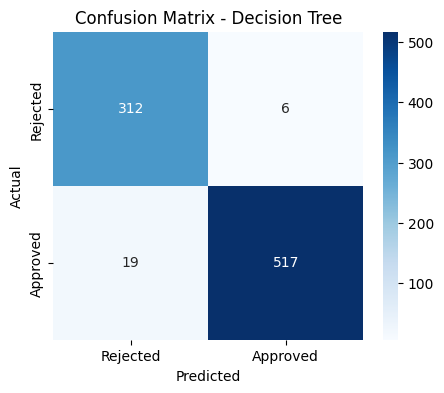

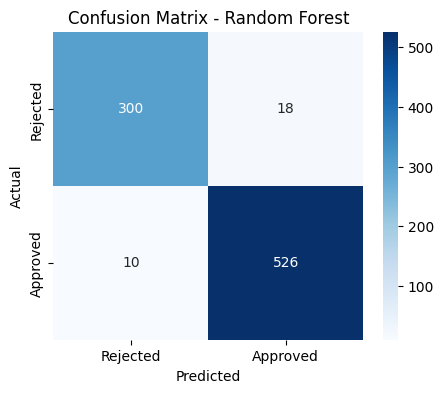

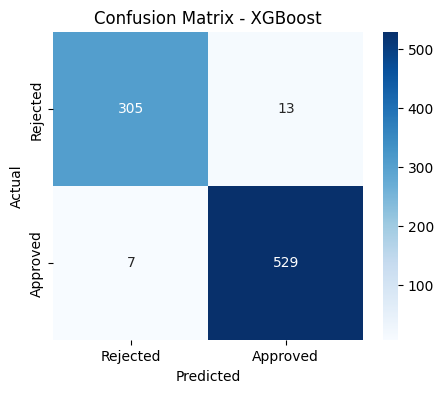

In [34]:
# Function to plot confusion matrix
def plot_conf_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")


C:\Users\Naftaly\AppData\Local\Temp\ipykernel_4472\2752819921.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df.Importance, y=importance_df.Feature, palette="viridis")


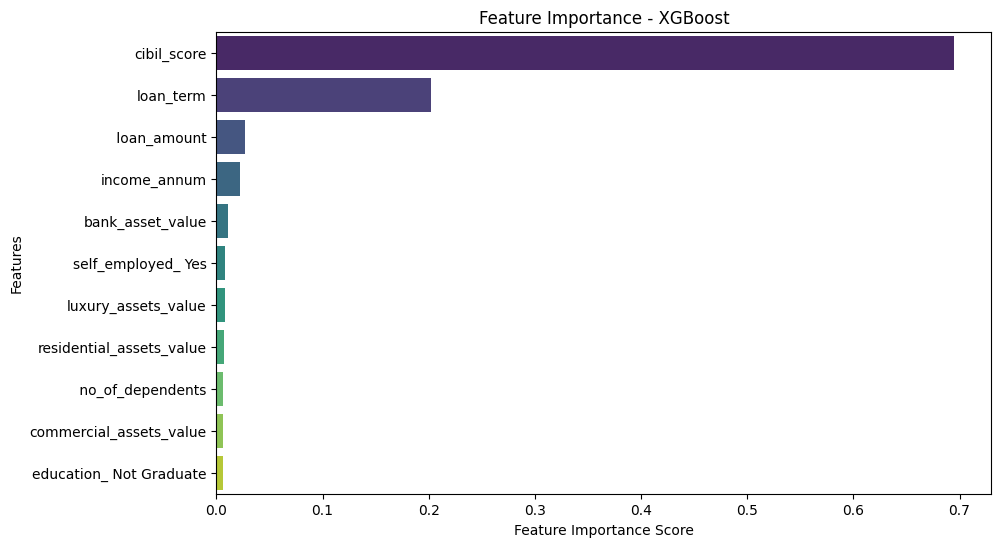

In [35]:
## Feature importance

# Get feature importances
feature_importance = xgb_clf.feature_importances_

# Create a DataFrame
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df.Importance, y=importance_df.Feature, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.show()